# Python mapping libraries

## Introduction

This notebook is inspired by the article ["6 python libraries to make beautiful maps"](https://medium.com/@alexroz/6-python-libraries-to-make-beautiful-maps-9fb9edb28b27) by Aleksei Rozanov, published in [Medium](https://medium.com/) in 2024.

You'll be guided through python mapping libraries: packages that visualize spatial data on a map. You will get familiar with several options how to display your spatial data either on a static picture map or on an interactive map.

These are the covered libraries:
- [Cartopy](#cartopy)
- [Folium](#folium)
- [Plotly](#plotly)
- [ipyleaflet](#ipyleaflet)
- [Geemap](#geemap)
- [Ridgemap](#ridgemap)

In [1]:
import requests
import os
import geopandas as gpd

In [2]:
# URL of the NUTS0 geojson to download
url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_01M_2021_4326_LEVL_0.geojson"

# NUTS0 regions will be downloaded in 1:1 000 000 scale resolution, valid for the year 2021 and in EPSG:4326 crs (WGS 84)
file_name = "NUTS_RG_01M_2021_4326_LEVL_0.geojson"

# os.getcwd() returns the path to the current directory => the directory where this notebook is
cwd = os.getcwd() + "/"

# set your own path where you want to save the geojson, it's recommended to save it in the same directory as this notebook is
file_path = os.path.join(cwd, file_name)

In [3]:
if os.path.exists(file_path):
    print("NUTS0 geojson file has already been downloaded.")
else:
    # object response contains the result of the GET request to the specified URL
    response = requests.get(url)

    if response.status_code == 200:
        # write the content to a file
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"File '{file_name}' downloaded successfully!")
    else:
        print("Failed to download the file.")

NUTS0 geojson file has already been downloaded.


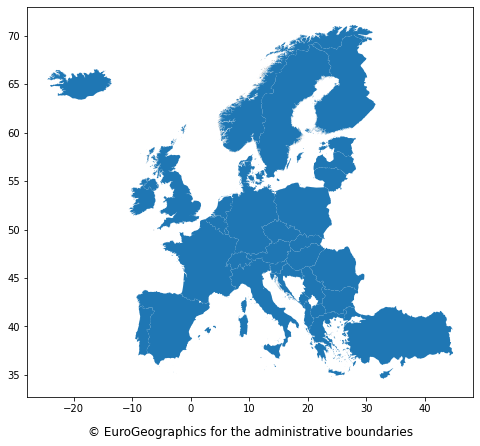

In [4]:
gdf_from_geojson = gpd.read_file(file_path)
nuts0_exploded = gdf_from_geojson.explode(index_parts=True)
nuts0_gdf = nuts0_exploded.cx[-15:, 34:70]
nuts0_gdf = nuts0_gdf.dissolve(by="NAME_LATN")
ax = nuts0_gdf.plot(figsize=(8, 8))
_ = ax.set_xlabel('© EuroGeographics for the administrative boundaries', fontsize=12, labelpad=12.0)

## Cartopy <a id="cartopy"></a>

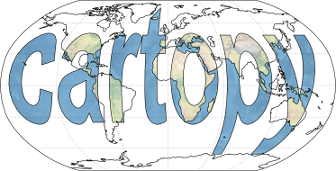

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib_scalebar.scalebar import ScaleBar

In [81]:
projections_list = [ccrs.Mollweide(), ccrs.InterruptedGoodeHomolosine(), ccrs.Orthographic(), 
                    ccrs.PlateCarree(), ccrs.AlbersEqualArea(),  ccrs.EckertI()]
projections_names = ['Mollweide', 'Interrupted Goode Homolosine', 'Orthographic', 
                     'Plate Carree', 'Albers Equal Area', 'Eckert I']

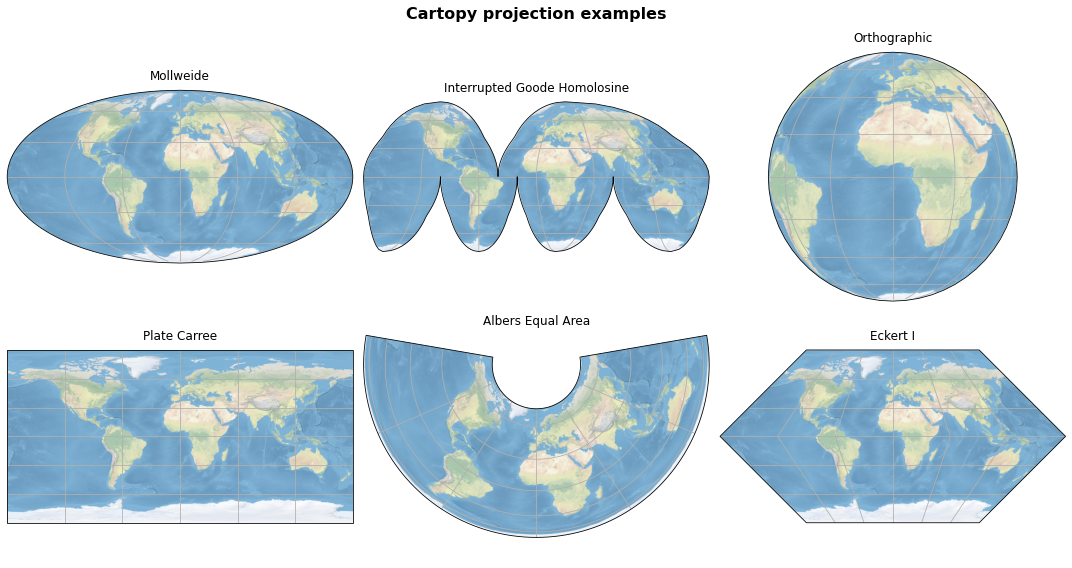

In [88]:
# create a figure and axis for each projection
fig, axes = plt.subplots(2, 3, figsize=(15, 8), subplot_kw={'projection': None})

# remove the unnecessary x and y axis
axes = axes.flatten()
for ax in axes:
    ax.set_axis_off()

# loop through each projection and plot the map
for i in range(len(projections_list)):
    ax = axes[i]
    ax = plt.subplot(2, 3, i+1, projection=projections_list[i])
    ax.stock_img()
    ax.gridlines()
    ax.set_title(projections_names[i], pad=10)

# set the plot layout and print it
fig.suptitle('Cartopy projection examples', fontsize=16, fontweight='bold', x=0.5, y=0.98, ha='center')
plt.tight_layout()
plt.show()

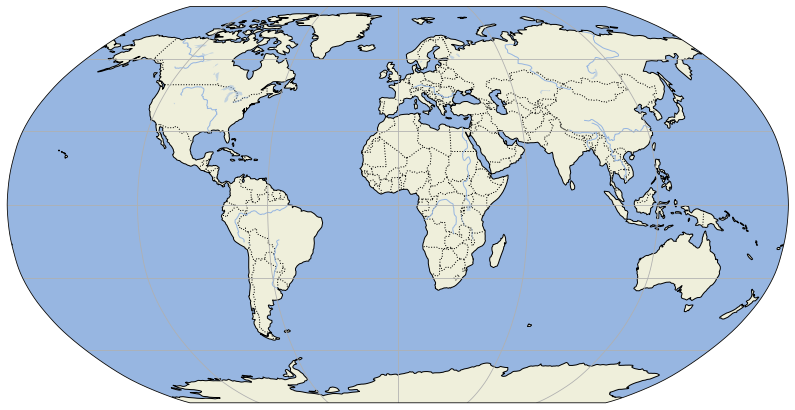

In [32]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.gridlines()

plt.show()

In [ ]:
nuts0_gdf_utm32 = nuts0_gdf.to_crs(32632)

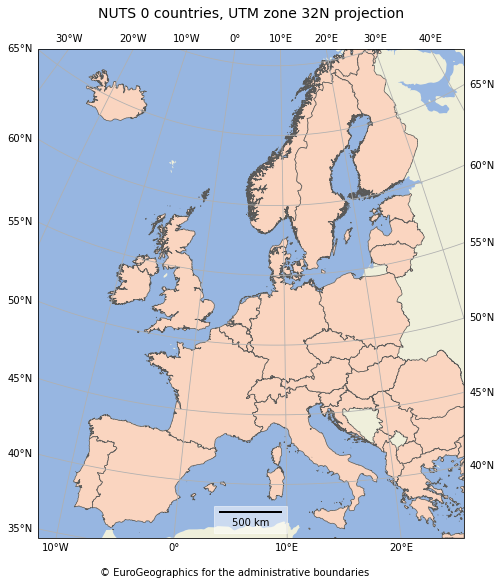

In [45]:
plt.figure(figsize=(9, 9))
projection=ccrs.EuroPP()
ax = plt.axes(projection=projection)

ax.add_feature(cfeature.LAND)
ax.add_geometries(nuts0_gdf_utm32['geometry'], crs=projection, edgecolor='#595958', facecolor='#fad5c0', linewidth=0.7)

ax.set_facecolor('#97b6e1')
ax.gridlines(draw_labels=True)
ax.add_artist(ScaleBar(dx=1, units="m", width_fraction=0.005, length_fraction=0.2, 
                       location="lower center", box_alpha=0.5, pad=0.5, border_pad=0.5))

ax.set_title('NUTS 0 countries, UTM zone 32N projection', fontsize=14, pad=16.0)
ax.text(x=-900000.0, y=3700000.0, s='© EuroGeographics for the administrative boundaries')

plt.show()

## Folium <a id="folium"></a>

In [27]:
import folium

## Plotly <a id="plotly"></a>

## ipyleaflet <a id="ipyleaflet"></a>

## Geemap <a id="geemap"></a>

## Ridgemap <a id="ridgemap"></a>